# Rock Physics Model
Before modeling, the bad reading data where the caliper <13in is excluded in calculation to provide reliable data.
Then data is classified into clean sand, shaly sand and shale. Since the model used is for clastics, only clean sand and shaly sand are being used in VRH, HM and consolidated model.
Model used in this data:

1. Voigt-Reuss-Hill

2. Upper and Lower Bound Hertz-Midzin

3. Consolidated Sand Model

4. Shale Model

Reading Materials:

*Ojala, I.O. Using rock physics for constructing synthetic sonic logs, ROCKENG09: Proceedings of the 3rd CANUS Rock Mechanics Symposium, Toronto, May 2009 (Ed: M.Diederichs and G.Grasselli), Paper 4016, 10p.

*Castagna, J, M Batzle, and T Kan (1993), Rock Physics - The Link Between Rock Properties and AVO Response. In Castagna, J and M Backus, eds. Offset-Dependent Reflectivity—Theory and Practice of AVO Analysis, 1993, p 135–171, DOI: 10.1190/1.9781560802624.

*Han, D, A Nur, and D Morgan (1986), Effects of porosity and clay content on wave velocities in sandstones. Geophysics, November 1986, p 2093–2107, DOI: 10.1190/1.1442062.

*Hashin, Z., and Shtrikman, S., 1963, A variational approach to the elastic behavior of multiphase minerals: J. Mech. Phys. Solids, 11, 127-140,DOI:10.1016/0022-5096(63)90060-7.

In [1]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os

In [2]:
#import data and change directory
dir='D:/Kuliah/Python/welldump.txt'
well=pd.read_csv(dir,sep='\s')
well.head()

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,depth,caliper,pef,rhob,dho,gr,npls,rshal,rdeep,rmic,vs,vp
0,1129.893555,21.6271,7.328317,1.99,-0.041197,53.742298,0.524392,1.181300,1.825800,0.171000,360.596497,145.949997
1,1130.046021,21.6271,7.031880,1.99,-0.037705,52.718201,0.501882,1.166468,1.780132,0.161697,368.352020,144.099472
2,1130.198364,21.6271,6.885134,1.99,-0.035804,50.444801,0.470402,1.126300,1.695500,0.157600,373.922607,142.899674
3,1130.350830,21.6271,6.845788,1.99,-0.033588,53.307899,0.464958,1.111206,1.708840,0.156801,374.661987,138.698624
4,1130.503174,21.6374,7.292623,1.99,-0.022009,55.783501,0.499787,1.119100,1.758300,0.157700,358.249847,135.999741


Text(0.5, 0, 'RHOB')

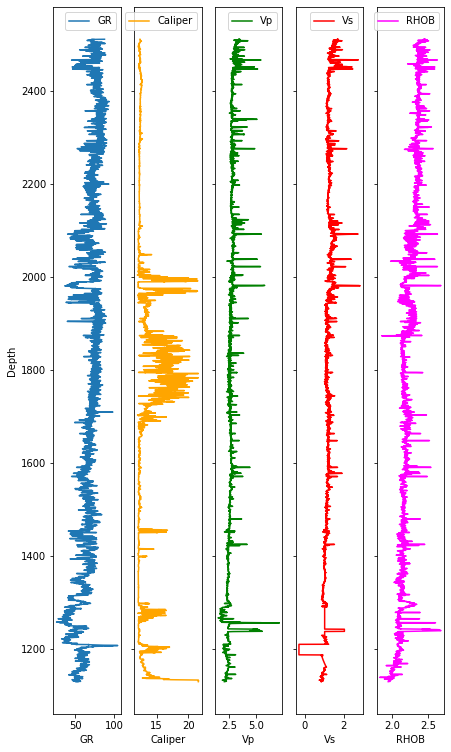

In [3]:
#LOG DATA PRECONDITIONING
vp=304.8/well.vp
vs=304.8/well.vs
dens=well.rhob+well.dho

well=well.assign(P=vp,Vs=vs,dens=dens)
well.head()

#bad caliper reading
wo=well[(well['caliper']<=13)]


##scatter template
template = {'alpha':0.8,'edgecolor':'k','linewidth':0.3,'cmap':'jet'}
f,ax=plt.subplots(1,5,figsize=(7,13),sharey=True)

ax[0].plot(well.gr,well.depth,label='GR')
ax[0].legend()
ax[0].set_xlabel('GR')
ax[0].set_ylabel('Depth')


ax[1].plot(well.caliper,well.depth,label='Caliper',c='orange')
ax[1].legend()
ax[1].set_xlabel('Caliper')


ax[2].plot(vp,well.depth,label='Vp',c='g')
ax[2].legend()
ax[2].set_xlabel('Vp')


ax[3].plot(vs,well.depth,label='Vs',c='r')
ax[3].legend()
ax[3].set_xlabel('Vs')

ax[4].plot(dens,well.depth,label='RHOB',c='magenta')
ax[4].legend()
ax[4].set_xlabel('RHOB')

Text(0.5, 0, 'RHOB')

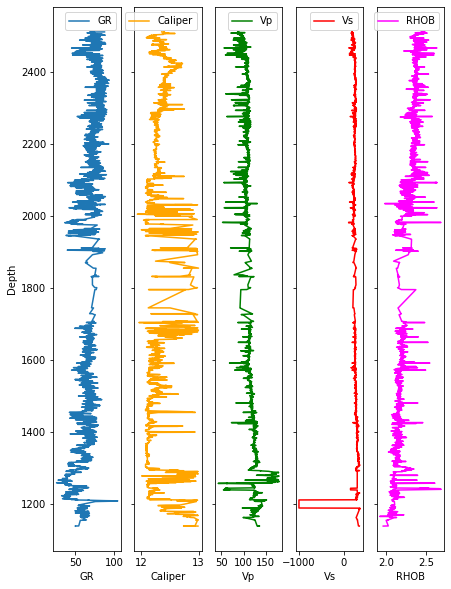

In [4]:
##scatter template
template = {'alpha':0.8,'edgecolor':'k','linewidth':0.3,'cmap':'jet'}
f,ax=plt.subplots(1,5,figsize=(7,10),sharey=True)

ax[0].plot(wo['gr'],wo['depth'],label='GR')
ax[0].legend()
ax[0].set_xlabel('GR')
ax[0].set_ylabel('Depth')

ax[1].plot(wo['caliper'],wo['depth'],label='Caliper',c='orange')
ax[1].legend()
ax[1].set_xlabel('Caliper')


ax[2].plot(wo['vp'],wo['depth'],label='Vp',c='g')
ax[2].legend()
ax[2].set_xlabel('Vp')


ax[3].plot(wo['vs'],wo['depth'],label='Vs',c='r')
ax[3].legend()
ax[3].set_xlabel('Vs')

ax[4].plot(wo['dens'],wo['depth'],label='RHOB',c='magenta')
ax[4].legend()
ax[4].set_xlabel('RHOB')

In [5]:
#log gr transformation
IGR=(well.gr-min(wo['gr']))/(max(wo['gr'])-min(wo['gr']))
VCL=(well.gr-min(wo['gr']))/(210-min(wo['gr']))

#adding new column in data
well = well.assign(IGR=IGR)
well = well.assign(VCL=VCL)

grmin=well.loc[well['VCL']<=0.12,'gr'].iloc[0]
grmax=well.loc[well['VCL']>0.3,'gr'].iloc[0]
vsh=(well.gr-grmin)/(grmax-grmin)


well=well.assign(vsh=vsh)

#log poro
psh=2.76+0.001*((well.dens-2)-230*np.exp(-4*(well.dens-2)))
pma=2.65*(1-vsh)+psh*vsh
por=(pma-well.dens)/(pma-1.01)

well = well.assign(por=por)
well.head()

,depth,caliper,pef,rhob,dho,gr,npls,rshal,rdeep,rmic,vs,vp,P,Vs,dens,IGR,VCL,vsh,por
0,1129.893555,21.6271,7.328317,1.99,-0.041197,53.742298,0.524392,1.181300,1.825800,0.171000,360.596497,145.949997,2.088386,0.845266,1.948803,0.350030,0.149186,0.177726,0.416666
1,1130.046021,21.6271,7.031880,1.99,-0.037705,52.718201,0.501882,1.166468,1.780132,0.161697,368.352020,144.099472,2.115206,0.827469,1.952295,0.336947,0.143610,0.147620,0.416586
2,1130.198364,21.6271,6.885134,1.99,-0.035804,50.444801,0.470402,1.126300,1.695500,0.157600,373.922607,142.899674,2.132965,0.815142,1.954196,0.307904,0.131231,0.080788,0.419516
3,1130.350830,21.6271,6.845788,1.99,-0.033588,53.307899,0.464958,1.111206,1.708840,0.156801,374.661987,138.698624,2.197570,0.813533,1.956412,0.344481,0.146821,0.164956,0.413249
4,1130.503174,21.6374,7.292623,1.99,-0.022009,55.783501,0.499787,1.119100,1.758300,0.157700,358.249847,135.999741,2.241181,0.850803,1.967991,0.376107,0.160300,0.237732,0.402747


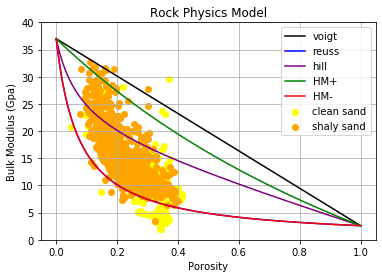

In [6]:
#rock physics calculation
VPVS = well.vp/well.vs #create vp/vs logs
AI = well['P']*well['dens']
pr = 0.5*(((VPVS)**2)-2)/(((VPVS)**2)-1) #Poisson's Ratio
myu = (vs*vs)*well['dens'] #Bulk Modulus (GPa)
young = 2*myu*(1+pr) # Young's Modulus (GPa)
bulk = well['dens']*(vp*vp)-(4/3)*myu # Bulk Modulus (GPa)
m = (vp**2)*well['dens'] #compressional modulus (GPa)

SI = vs*well['dens']
LR = SI**2
MR = AI**2 - 2*SI**2


well= well.assign(VPVS=VPVS, P=vp, VS=vs,AI=AI,PR=pr, G=myu, K=bulk, M=m, E=young,SI=SI,LR=LR,MR=MR)
well.head()

#buat pake colorbar
#plt.scatter(well.VP,well.VS,c=well.depth,**template,label='Velocity')
Kmix=37
Mmix=44
Mb=2.6
#rock physics model voigt-reuss-hill
frac=pd.Series(np.linspace(0,1,100))
kv=((1-frac)*Kmix+frac*2.6)
mv=(1-frac)*Mmix
kr=1/((1-frac)/Kmix+frac/2.6)
mr=(1-frac)/Mmix
kh=(kv+kr)/2
mh=(mv+mr)/2

#rock physics model hertz-mindzin
kp=37+((frac)/((1/(2.6-37))+((1-frac)/(37+(4*Mmix/3)))))
kn=2.6+((1-frac)/((1/(37-2.6))+((frac)/(2.6+(4*0/3)))))
#lithology classification
cs=well[(well['vsh']<=0.12)&(well['caliper']<=14)&(well['P']<=4)]
ss=well[(well['vsh']>0.3)&(well['caliper']<=14)&(well['P']<=4)]
sh=well[(well['vsh']>=1)&(well['caliper']<=14)&(well['P']<=4)]
ls=well[(well['P']>=4)]
##plot classification result
#plt.scatter(cs['por'],cs['K'],c='yellow')
#plt.scatter(ss['por'],ss['K'],c='orange')
#plt.scatter(sh['por'],sh['K'],c='g')
#plt.scatter(ls['por'],ls['K'],c='blue')
#plt.legend(['clean sand','shaly sand','shale','limestone'])
#plt.title('Lithology Classification')
#plt.xlabel('Porosity')
#plt.ylabel('Bulk Modulus (GPa)')

#plt.grid()
                 
##plot classification result
plt.scatter(cs['por'],cs['K'],c='yellow')
plt.scatter(ss['por'],ss['K'],c='orange')
plt.plot(frac,kv,c='black')
plt.plot(frac,kr,c='blue')
plt.plot(frac,kh,c='purple')
plt.plot(frac,kp,c='green')     
plt.plot(frac,kn,c='red')
plt.ylim(0,40)
plt.legend(['voigt','reuss','hill','HM+','HM-','clean sand','shaly sand','shale'])
plt.title('Rock Physics Model')
plt.xlabel('Porosity')
plt.ylabel('Bulk Modulus (Gpa)')
plt.grid()

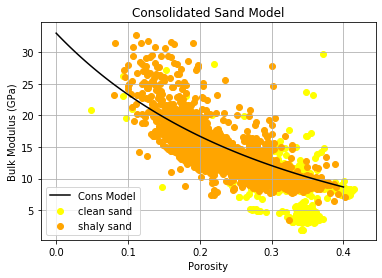

In [7]:
#consolidated and poorly consolidated sandstone
frcs=pd.Series(np.linspace(0,0.4,100))
kss=33
gss=25.3
rss=2.67
b=12
ass=2.92
bss=1.50
dss=0.07
prss=20000
porconss=0.27
porc=0.35
mss=2
nss=2.5
pq=3.6+bss*frcs
no=0.3+1.6*frcs

kd=kss/(1+(pq*frcs/(1-frcs))+(ass*no*np.exp(-dss*prss)/(1-frcs)))
kr=1/((1-frac)/Kmix+frac/2.6)

##plot classification result
plt.scatter(cs['por'],cs['K'],c='yellow')
plt.scatter(ss['por'],ss['K'],c='orange')
plt.plot(frcs,kd,c='black')
plt.plot()
plt.title('Consolidated Sand Model')
plt.xlabel('Porosity')
plt.ylabel('Bulk Modulus (GPa)')
plt.legend(['Cons Model','clean sand','shaly sand'])
plt.grid()

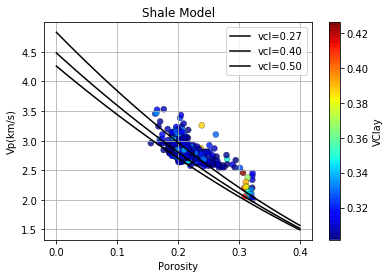

In [8]:
#SHALE MODELING
frcs=pd.Series(np.linspace(0,0.4,100))
#vp batuserpih
#pm sh=psh
cl=0.27
kbin=5.3-1.3*cl
ccc=1/((cl/33.4)+((1-cl)/96))
vpss=np.sqrt((ccc*((1-frcs)**(kbin)))/((2.73*(1-frcs)+(1.08*frcs))))

bl=0.4
kbin=5.3-1.3*bl
ccc=1/((bl/33.4)+((1-bl)/96))
bpss=np.sqrt((ccc*((1-frcs)**(kbin)))/((2.73*(1-frcs)+(1.08*frcs))))
dl=0.5
kbin=5.3-1.3*dl
ccc=1/((dl/33.4)+((1-dl)/96))
dpss=np.sqrt((ccc*((1-frcs)**(kbin)))/((2.73*(1-frcs)+(1.08*frcs))))


plt.scatter(sh['por'],sh['P'],c=sh['VCL'],**template,label='Vclay')
plt.plot(frcs,vpss,c='black')
plt.plot(frcs,bpss,c='black')
plt.plot(frcs,dpss,c='black')
plt.title('Shale Model')
plt.xlabel('Porosity')
plt.ylabel('Vp(km/s)')
plt.legend(['vcl=0.27','vcl=0.40','vcl=0.50'])
plt.grid()
cbr=plt.colorbar()
cbr.set_label('VClay')

SyntaxError: invalid syntax (<ipython-input-9-f9b49782e9ed>, line 2)